In [1]:
import sys
sys.path.append('../')

In [2]:
from data_loading import ChatHighlightData
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from utils import moving_avg
from sklearn.preprocessing import MinMaxScaler

In [3]:
chd = ChatHighlightData(chat_dir="../data/final_data",
                 highlight_dir="../data/gt",
                 emote_dir="../data/emotes")

In [4]:
chd.load_data(file_identifier="nalcs_w4d3_FOX_TSM_g1")
chd.load_emotes(file_identifier="nalcs_w4d3_FOX_TSM_g1")

In [5]:
chd.get_chat_measure("message_density")

{'nalcs_w4d3_FOX_TSM_g1': array([0, 0, 0, ..., 0, 1, 0])}

In [6]:
chms = ['message_density',
        'emote_density',
        "message_diversity",
        'copypasta_density']

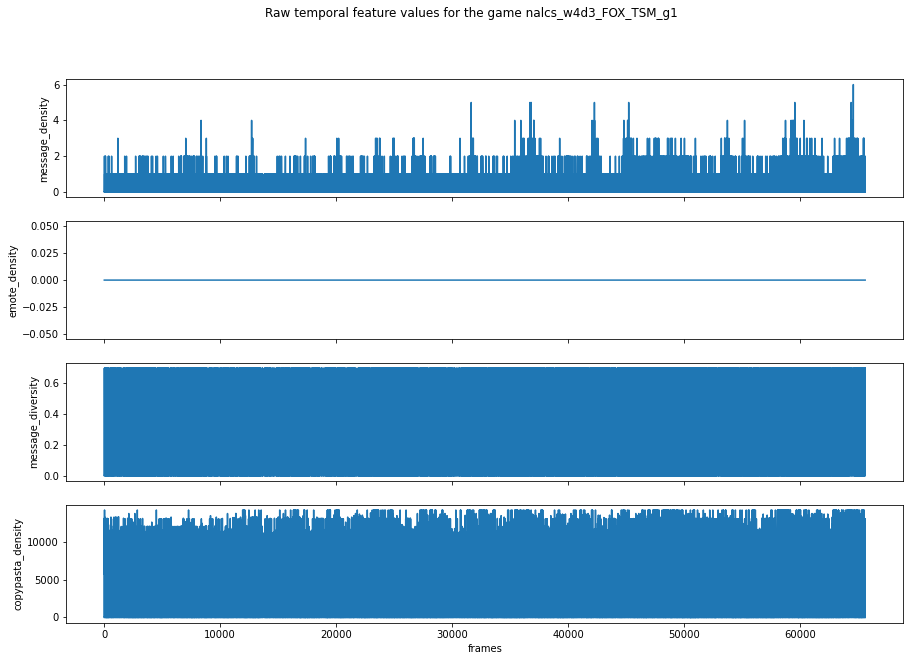

In [7]:
fig, axes = plt.subplots(len(chms), figsize=(15, 10), sharex=True)
fig.suptitle("Raw temporal feature values for the game nalcs_w4d3_FOX_TSM_g1")
#fig.tight_layout(h_pad=2)

for i, m in enumerate(chms):
    chm = list(chd.get_chat_measure(m).values())[0]
    ax = axes[i]
    ax.plot(list(range(len(chm))), chm)
    ax.set_ylabel(m.lower())
    ax.set_ylabel(m.lower())
    if m == "copypasta_density":
        ax.set_xlabel("frames")

In [8]:
fig.savefig("./raw_temp_features_baselines.jpg")

### message density and highlights plot

In [9]:
msg_dens_example = MinMaxScaler().fit_transform(moving_avg(chd.get_chat_measure("message_density")["nalcs_w4d3_FOX_TSM_g1"], N=1500).reshape(-1,1))
highlights_example = chd.get_highlight_data()["nalcs_w4d3_FOX_TSM_g1"]

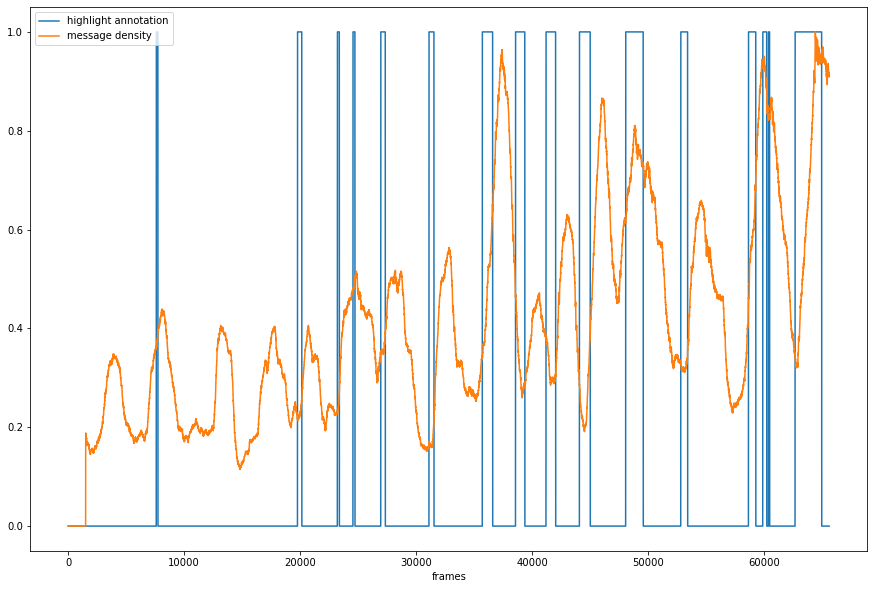

In [10]:
#fig.suptitle("Averaged and scaled message density and highlight annotations for game nalcs_w4d3_FOX_TSM_g1")
plt.figure(figsize=(15, 10))
plt.plot(list(range(len(highlights_example))), highlights_example, label="highlight annotation")
plt.plot(list(range(len(msg_dens_example))), msg_dens_example, label="message density")
plt.xlabel("frames")
plt.legend(loc="upper left")
fig1 = plt.gcf()

plt.show()

In [54]:
fig1.savefig("./message_density_highlights_example.jpg")

In [15]:
chd.get_match_meta_data()

{'nalcs_w4d3_FOX_TSM_g1': {'highlight_spans': [(7588, 7727),
   (19762, 20131),
   (23200, 23368),
   (24544, 24714),
   (26941, 27330),
   (31097, 31526),
   (35695, 36585),
   (38559, 39359),
   (41187, 42016),
   (44068, 44998),
   (48056, 49566),
   (52805, 53395),
   (58642, 59271),
   (59875, 60214),
   (60366, 60464),
   (62661, 64952)],
  'highlight_lengths': [140,
   370,
   169,
   171,
   390,
   430,
   891,
   801,
   830,
   931,
   1511,
   591,
   630,
   340,
   99,
   2292],
  'highlight_count': 16,
  'highlight_avg_len': 661.625}}